In [1]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)
    
credentials = {}
credentials['name'] = 'sat'
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['project_id'] = '768b985c87194b80a86118632e428598'
credentials['region'] = 'dallas'
credentials['user_id'] = 'a2b6952b7a8442e68aae6e834247ece3'
credentials['password'] = 'DmM9{2N92~4b1z)d'
credentials['username'] = 'user_599bf51d7b0485fa0f3ef055545267d6b1edeb95'
credentials['filename'] = 'sat2014.csv'
credentials['container'] = 'notebooks'

set_hadoop_config(credentials)

sat = sc.textFile("swift://notebooks.sat/sat2014.csv")

In [2]:
print "Total records in the sat14.csv dataset:", sat.count()
print "The first row in the sat2014.csv dataset:", sat.first()
satParse = sat.map(lambda line : line.split(","))
#get the School record of Calinfornia, filter the record that x[10] is not null
satSchool = satParse.filter(lambda x: x[1] == "S" and x[10] != '*' and x[10] != 'NA')

Total records in the sat14.csv dataset: 2479
The first row in the sat2014.csv dataset: CDS,RTYPE,SNAME,DNAME,CNAME,Enroll912,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrite,NumGE1500,PctGE1500


In [19]:
#find the top 10 school who has the most student numbers whose SAT scores are higher than 1500
scoreTop20=[]
schoolTop20=[]
for x in satSchool.map(lambda x : (int(x[10]), x[2])).top(20):
    scoreTop20.append(x[0])
    schoolTop20.append(x[1])
    print "School %s has %s Student whose Sat score higher than 1500" % (x[1], x[0])

School Lowell High has 876 Student whose Sat score higher than 1500
School Arcadia High has 846 Student whose Sat score higher than 1500
School Granada Hills Charter High has 772 Student whose Sat score higher than 1500
School Diamond Bar High has 698 Student whose Sat score higher than 1500
School Monta Vista High has 681 Student whose Sat score higher than 1500
School Troy High has 674 Student whose Sat score higher than 1500
School Dougherty Valley High has 617 Student whose Sat score higher than 1500
School Palos Verdes Peninsula High has 616 Student whose Sat score higher than 1500
School Walnut High has 596 Student whose Sat score higher than 1500
School Amador Valley High has 593 Student whose Sat score higher than 1500
School Mission San Jose High has 577 Student whose Sat score higher than 1500
School Davis Senior High has 572 Student whose Sat score higher than 1500
School Torrey Pines High has 556 Student whose Sat score higher than 1500
School Crescenta Valley High has 556 

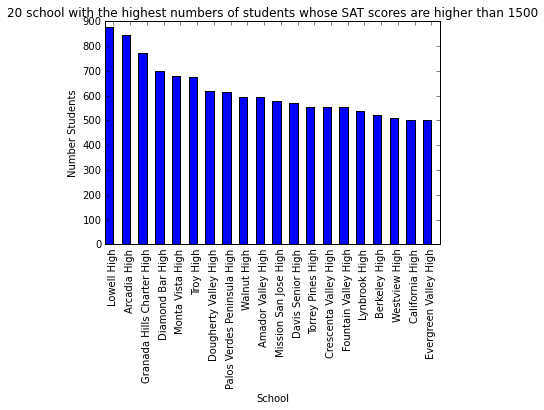

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, scoreTop20, bar_width,
                 color='b')
plt.xlabel('School')
plt.ylabel('Number Students')
plt.title('20 school with the highest numbers of students whose SAT scores are higher than 1500')
plt.xticks(index + bar_width, schoolTop20, rotation=90)
plt.show()

In [17]:
#find the top 10 school who has the most percent of student numbers whose SAT scores are higher than 1500
scoreTop20=[]
schoolTop20=[]
for x in satSchool.map(lambda x : (float(x[11]), x[2])).top(20):
    scoreTop20.append(x[0])
    schoolTop20.append(x[1])
    print "School %s has %s percent of students whose Sat score higher than 1500" % (x[1], x[0])

School "Math has 437.0 percent of students whose Sat score higher than 1500
School "Crenshaw Science has 382.0 percent of students whose Sat score higher than 1500
School Whitney (Gretchen) High has 98.09 percent of students whose Sat score higher than 1500
School Oxford Academy has 98.08 percent of students whose Sat score higher than 1500
School Monta Vista High has 95.24 percent of students whose Sat score higher than 1500
School Piedmont High has 93.75 percent of students whose Sat score higher than 1500
School Lynbrook High has 93.74 percent of students whose Sat score higher than 1500
School Pacific Collegiate Charter has 93.4 percent of students whose Sat score higher than 1500
School Northwood High has 93.36 percent of students whose Sat score higher than 1500
School Mission San Jose High has 93.06 percent of students whose Sat score higher than 1500
School Canyon Crest Academy has 92.28 percent of students whose Sat score higher than 1500
School Henry M. Gunn High has 92.14 pe

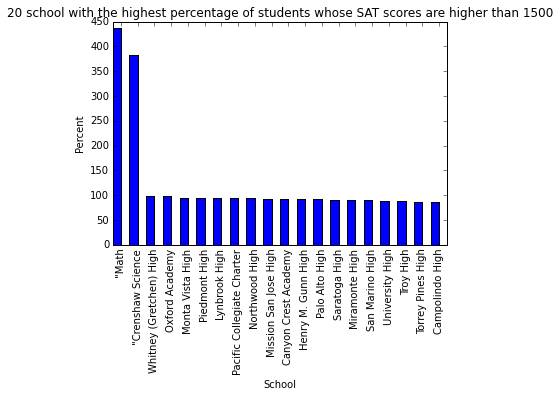

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, scoreTop20, bar_width,
                 color='b')
plt.xlabel('School')
plt.ylabel('Percent')
plt.title('20 school with the highest percentage of students whose SAT scores are higher than 1500')
plt.xticks(index + bar_width, schoolTop20, rotation=90)
plt.show()

In [11]:
#filter the record to only show the county records
satCounty = satParse.filter(lambda x: x[1] == "C" and x[6] != "*" and x[6] != "NA")

In [15]:
#Find the top 20 counties who have the most Number of Test Takers
takersTop20=[]
countyTop20=[]
for x in satCounty.map(lambda x : (float(x[6]), x[4])).top(20):
    takersTop20.append(x[0])
    countyTop20.append(x[1])
    print "School %s has %s students who took Sat Test" % (x[1], x[0])

School Los Angeles has 79839.0 students who took Sat Test
School Orange has 27664.0 students who took Sat Test
School San Diego has 25548.0 students who took Sat Test
School Riverside has 18780.0 students who took Sat Test
School San Bernardino has 16204.0 students who took Sat Test
School Santa Clara has 14881.0 students who took Sat Test
School Alameda has 12919.0 students who took Sat Test
School Sacramento has 10082.0 students who took Sat Test
School Contra Costa has 9754.0 students who took Sat Test
School Fresno has 7941.0 students who took Sat Test
School Ventura has 5941.0 students who took Sat Test
School Kern has 5644.0 students who took Sat Test
School San Mateo has 5096.0 students who took Sat Test
School San Joaquin has 4765.0 students who took Sat Test
School San Francisco has 4443.0 students who took Sat Test
School Placer has 4192.0 students who took Sat Test
School Stanislaus has 3691.0 students who took Sat Test
School Tulare has 3233.0 students who took Sat Test
Sch

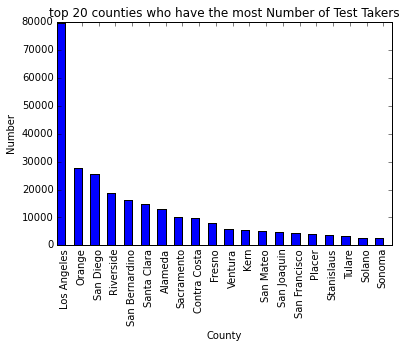

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, takersTop20, bar_width,
                 color='b')
plt.xlabel('County')
plt.ylabel('Number')
plt.title('top 20 counties who have the most Number of Test Takers')
plt.xticks(index + bar_width, countyTop20, rotation=90)
plt.show()

In [23]:
#find the top 20 counties whose students are most good at Critical Reading
countyTop20=[]
scoreTop20=[]
for x in satCounty.map(lambda x : (float(x[7]), x[4])).top(20):
    scoreTop20.append(x[0])
    countyTop20.append(x[1])
    print "School %s has average Reading Score %s" % (x[1], x[0])

School Marin has average Reading Score 550.0
School Nevada has average Reading Score 549.0
School Santa Clara has average Reading Score 545.0
School Mariposa has average Reading Score 545.0
School Tuolumne has average Reading Score 543.0
School San Luis Obispo has average Reading Score 541.0
School El Dorado has average Reading Score 538.0
School Amador has average Reading Score 537.0
School Shasta has average Reading Score 536.0
School San Mateo has average Reading Score 532.0
School Calaveras has average Reading Score 531.0
School Humboldt has average Reading Score 530.0
School Yolo has average Reading Score 527.0
School Sierra has average Reading Score 527.0
School Sonoma has average Reading Score 526.0
School Plumas has average Reading Score 525.0
School Placer has average Reading Score 524.0
School Butte has average Reading Score 524.0
School Mendocino has average Reading Score 523.0
School Ventura has average Reading Score 522.0


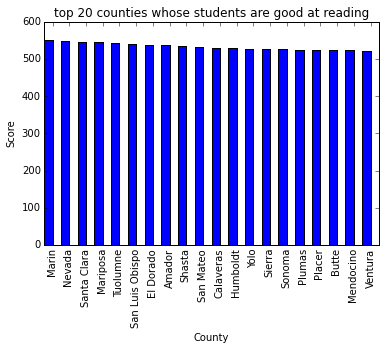

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, scoreTop20, bar_width,
                 color='b')
plt.xlabel('County')
plt.ylabel('Score')
plt.title('top 20 counties whose students are good at reading')
plt.xticks(index + bar_width, countyTop20, rotation=90)
plt.show()

In [27]:
#find the top 20 counties whose students are most good at Math
countyTop20=[]
scoreTop20=[]
for x in satCounty.map(lambda x : (float(x[8]), x[4])).top(20):
    scoreTop20.append(x[0])
    countyTop20.append(x[1])
    print "School %s has average Math Score %s" % (x[1], x[0])

School Santa Clara has average Math Score 578.0
School San Mateo has average Math Score 558.0
School Marin has average Math Score 554.0
School El Dorado has average Math Score 552.0
School Nevada has average Math Score 544.0
School San Luis Obispo has average Math Score 542.0
School Alameda has average Math Score 541.0
School Shasta has average Math Score 539.0
School Orange has average Math Score 538.0
School Mariposa has average Math Score 538.0
School Yolo has average Math Score 537.0
School San Francisco has average Math Score 537.0
School Ventura has average Math Score 534.0
School Placer has average Math Score 534.0
School Sonoma has average Math Score 532.0
School Butte has average Math Score 531.0
School Amador has average Math Score 529.0
School Tuolumne has average Math Score 526.0
School Plumas has average Math Score 526.0
School Santa Cruz has average Math Score 523.0


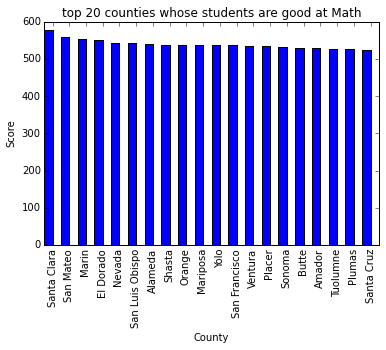

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, scoreTop20, bar_width,
                 color='b')
plt.xlabel('County')
plt.ylabel('Score')
plt.title('top 20 counties whose students are good at Math')
plt.xticks(index + bar_width, countyTop20, rotation=90)
plt.show()

In [29]:
#find the top 20 counties whose students are most good at Writing
countyTop20=[]
scoreTop20=[]
for x in satCounty.map(lambda x : (float(x[9]), x[4])).top(20):
    scoreTop20.append(x[0])
    countyTop20.append(x[1])
    print "School %s has average Writing Score %s" % (x[1], x[0])

School Santa Clara has average Writing Score 550.0
School Marin has average Writing Score 549.0
School San Mateo has average Writing Score 532.0
School El Dorado has average Writing Score 528.0
School San Luis Obispo has average Writing Score 525.0
School Nevada has average Writing Score 524.0
School Tuolumne has average Writing Score 520.0
School Sonoma has average Writing Score 520.0
School Mariposa has average Writing Score 520.0
School Alameda has average Writing Score 520.0
School Yolo has average Writing Score 518.0
School Ventura has average Writing Score 517.0
School Santa Cruz has average Writing Score 516.0
School Sierra has average Writing Score 515.0
School Orange has average Writing Score 514.0
School Shasta has average Writing Score 513.0
School Placer has average Writing Score 512.0
School Contra Costa has average Writing Score 512.0
School Calaveras has average Writing Score 512.0
School Amador has average Writing Score 512.0


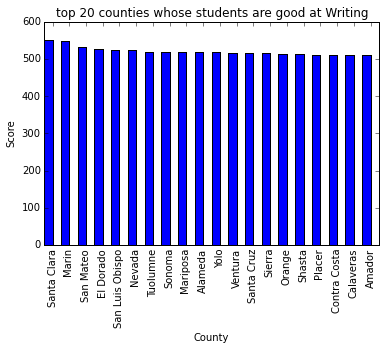

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, scoreTop20, bar_width,
                 color='b')
plt.xlabel('County')
plt.ylabel('Score')
plt.title('top 20 counties whose students are good at Writing')
plt.xticks(index + bar_width, countyTop20, rotation=90)
plt.show()

In [31]:
#find the county which has most schools who has most percent of students with SAT scores higher than 1500
satSchool = satParse.filter(lambda x: x[1] == "S" and x[11] != '*' and x[11] != 'NA' and x[11] > 50)


In [32]:
satSchoolCountByKey = satSchool.map(lambda x : (x[3], 1))

In [33]:
satSchoolCountByKey.first()

(u'Alameda County Office of Educa', 1)

In [34]:
satSchoolAddByKey = satSchoolCountByKey.reduceByKey(lambda v1,v2 : (v1 + v2))

In [35]:
satSchoolAddByKey.first()

(u'San Luis Coastal Unified', 2)

In [47]:
countyTop20=[]
numberSchoolTop20=[]
for x in satSchoolAddByKey.map(lambda (a,b) : (b,a)).top(20):
    countyTop20.append(x[1])
    numberSchoolTop20.append(x[0])
    print "County %s had %s schools which has more than 50 percent of students who had SAT score higher than 1500" % (x[1],x[0])
    

County Los Angeles Unified had 170 schools which has more than 50 percent of students who had SAT score higher than 1500
County San Diego Unified had 37 schools which has more than 50 percent of students who had SAT score higher than 1500
County Oakland Unified had 19 schools which has more than 50 percent of students who had SAT score higher than 1500
County San Francisco Unified had 18 schools which has more than 50 percent of students who had SAT score higher than 1500
County Kern High had 18 schools which has more than 50 percent of students who had SAT score higher than 1500
County East Side Union High had 14 schools which has more than 50 percent of students who had SAT score higher than 1500
County Sweetwater Union High had 12 schools which has more than 50 percent of students who had SAT score higher than 1500
County Sacramento City Unified had 12 schools which has more than 50 percent of students who had SAT score higher than 1500
County Grossmont Union High had 12 schools whi

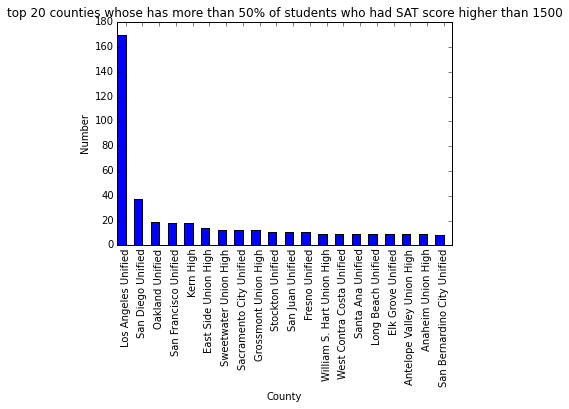

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, numberSchoolTop20, bar_width,
                 color='b')
plt.xlabel('County')
plt.ylabel('Number')
plt.title('top 20 counties whose has more than 50% of students who had SAT score higher than 1500')
plt.xticks(index + bar_width, countyTop20, rotation=90)
plt.show()